<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/banner_dl.png">


<br><br><center><h1 style="font-size:2em;color:#2467C0"> Cambio de perspectiva   </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/cartas.jpg" align="middle" style="width:450px;"/></td>
<td>

En esta lección aplicaremos funciones de **OpenCV** para llevar a cabo transformaciones geométricas, con el objetivo de cambiar la perspectiva de un conductor de automóvil a la vista aérea y de esta manera tener una mejor comprensión del camino.
   
<br>
</td>
</tr>
</table>

# 0. Librerías básicas

In [1]:
#Librerías básicas de esta notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import pandas as pd

# Actividad 1

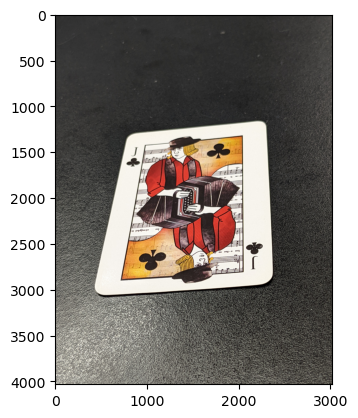

In [2]:
#Obtenga la imagen de la carta que le ha proporcionado el profesor
img = cv.imread('figuras/cartaj.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

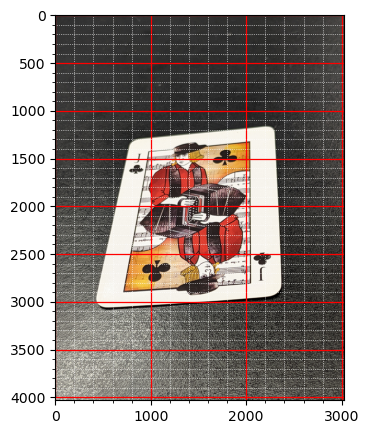

In [4]:
#Ampliar y mejorar la visibilidad del plano cartesiano
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

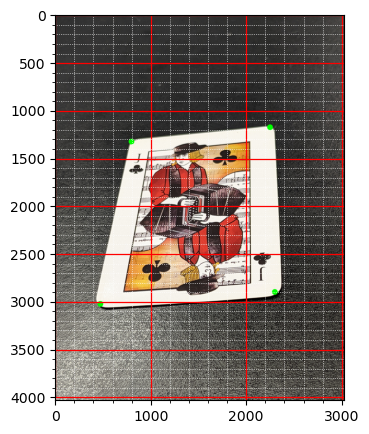

In [11]:
#Puntos de las esquinas
P1 = (800,1325)
P2 = (2250,1175)
P3 = (475,3025)
P4 = (2300,2900)

img = cv.imread("figuras/cartaj.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

cv.circle(img, P1 , 30, (0,255,0), -1 ) 
cv.circle(img, P2 , 30, (0,255,0), -1 ) 
cv.circle(img, P3 , 30, (0,255,0), -1 ) 
cv.circle(img, P4 , 30, (0,255,0), -1 ) 

fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img)
ax.minorticks_on()
ax.grid(which='major', linestyle='-', linewidth='0.9', color='red')
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='white')

In [16]:
#Obteniendo la matriz de transformación y cambiando de perspectiva
ratio= 1
altura = 800*ratio
ancho = 560*ratio

pts1 = np.float32( [  P1, P2, P3, P4] )
pts2 = np.float32( [ [0,0] , [ancho,0], [0, altura] ,[ancho, altura] ] )

matrix = cv.getPerspectiveTransform(pts1, pts2)
img_NewPerspective = cv.warpPerspective(img, matrix, (ancho,altura))

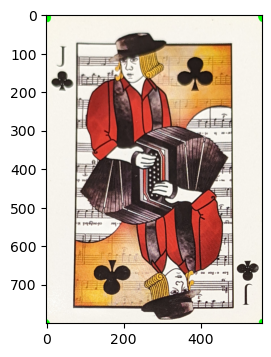

In [17]:
#Imagen con cambio de perspectiva 
plt.figure(figsize = (4,4))
plt.imshow(img_NewPerspective)
plt.show()

### Resultado final

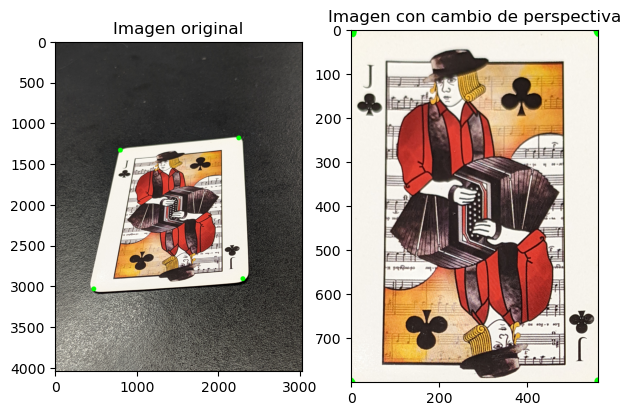

In [18]:
# Mostrar la imagen original y la que tiene el cambio  de perspectiva 
plt.figure(figsize=(7,7))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Imagen original")
plt.subplot(1,2,2)
plt.imshow(img_NewPerspective)
plt.title("Imagen con cambio de perspectiva")
plt.show()